In [ ]:
#imported the packages
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#50000 = 25000+ and 25000-
import pandas as pd
path = "/content/drive/MyDrive/IMDB Dataset.csv"
data = pd.read_csv(path)

In [ ]:
print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [ ]:
positive_reviews = []
negative_reviews = []

for index, row in data.iterrows():
    review = row['review']
    sentiment = row['sentiment']

    if sentiment == 'positive':
        positive_reviews.append(review)
    else:
        negative_reviews.append(review)

In [ ]:
len(positive_reviews),len(negative_reviews)

(25000, 25000)

In [ ]:
files_pos=positive_reviews[0:1000]
files_neg=negative_reviews[0:1000]
#taking the subset

In [ ]:
len(files_pos),len(files_neg)

(1000, 1000)

In [ ]:
all_words=[]
documents=[]

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import re
stop_word = list(set(stopwords.words('english')))
#j is adjective r is adverb v is verb
#allowed word types =["J","R","V"]
# we only want adverbs and adjectives
allowed_word_types=["J"]
#for all reviews
for p in files_pos:
  #create list of tuples where the first element of tuple is review
  #the second element is label
  documents.append((p,"pos"))
  #remove punctuations
  # the \s means the space a-z means small letters and A-Z means capital letters
  #this command will substitute the following with '' nothing
  cleaned=re.sub(r'[^(a-zA-Z)\s]','',p)
  #tokenize
  tokenized=word_tokenize(cleaned)
  #remove stopwords
  stopped=[w for w in tokenized if not w in stop_word]
  #parts of speech tagging for each word
  pos=nltk.pos_tag(stopped)
  #make list of adjectives identified by that allowed word types list above
  for w in pos:
    if(w[1][0] in allowed_word_types):
      all_words.append(w[0].lower())
for p in files_neg:
  #create list of tuples where the first element of tuple is review
  #the second element is label
  documents.append((p,"neg"))
  #remove punctuations
  cleaned=re.sub(r'[^(a-zA-Z)\s]','',p)
  #tokenize
  tokenized=word_tokenize(cleaned)
  #remove stopwords
  stopped=[w for w in tokenized if not w in stop_word]
  #parts of speech tagging for each word
  neg=nltk.pos_tag(stopped)
  #make list of adjectives identified by that allowed word types list above
  for w in neg:
    if(w[1][0] in allowed_word_types):
      all_words.append(w[0].lower())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
all_words=nltk.FreqDist(all_words)
all_words

FreqDist({'good': 1045, 'bad': 663, 'great': 619, 'many': 537, 'much': 527, 'little': 470, 'best': 388, 'real': 365, 'first': 340, 'old': 300, ...})

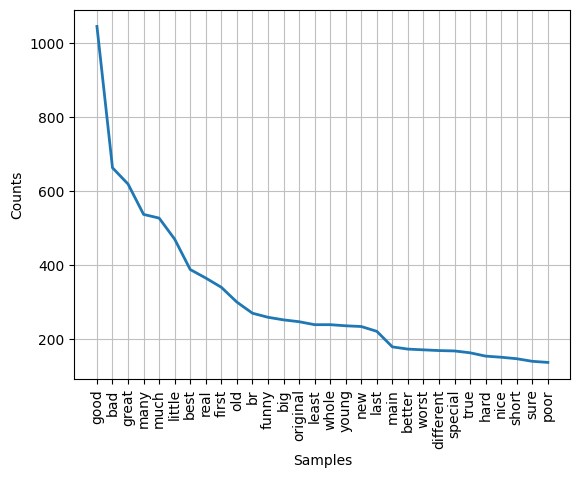

In [ ]:
import matplotlib.pyplot as plt
all_words.plot(30,cumulative=False)
plt.show()

In [ ]:
#listing the 1000 most frequent words
word_features=list(all_words.keys())[:1000]
print(word_features)

['first', 'classic', 'experimental', 'high', 'irish', 'shady', 'awaybr', 'main', 'due', 'painted', 'charm', 'struck', 'nasty', 'ready', 'accustomed', 'graphic', 'crooked', 'nickel', 'mannered', 'middle', 'comfortable', 'uncomfortable', 'touch', 'wonderful', 'little', 'oldtimebbc', 'entire', 'polari', 'seamless', 'guided', 'diary', 'terrificly', 'masterful', 'great', 'use', 'traditional', 'solid', 'flat', 'spend', 'hot', 'simplistic', 'likable', 'serial', 'many', 'grown', 'lovebr', 'right', 'young', 'wittier', 'vivid', 'human', 'different', 'br', 'theme', 'present', 'connect', 'next', 'previous', 'luxurious', 'souls', 'big', 'best', 'sincere', 'fulfillment', 'good', 'alltime', 'favorite', 'selflessness', 'noble', 'old', 'last', 'sympathetic', 'believable', 'kid', 'black', 'white', 'new', 'adventureoh', 'thank', 'ole', 'saywould', 'nice', 'original', 'liked', 'fantastic', 'famous', 'clooney', 'bad', 'constant', 'excellent', 'major', 'special', 'enjoy', 'older', 'filmit', 'cinema', 'dark'

In [ ]:
#function to create a dictionary of features for each review int he list document
#the keys are the words in word_features
#the values of each key are either true or false for weather that feature appears in review or not
def find_features(document):
  words=word_tokenize(document)
  features={}
  for w in word_features:
    features[w]=(w in words)
  return features
#creating features for each review
featuresets=[(find_features(rev),category) for (rev,category) in documents]
#reshuffling the documents
random.shuffle(featuresets)
training_set=featuresets[:800]
testing_set=featuresets[800:]

In [ ]:
featuresets[1]

({'first': False,
  'classic': False,
  'experimental': False,
  'high': False,
  'irish': False,
  'shady': False,
  'awaybr': False,
  'main': False,
  'due': False,
  'painted': False,
  'charm': False,
  'struck': False,
  'nasty': False,
  'ready': False,
  'accustomed': False,
  'graphic': False,
  'crooked': False,
  'nickel': False,
  'mannered': False,
  'middle': False,
  'comfortable': False,
  'uncomfortable': False,
  'touch': False,
  'wonderful': False,
  'little': False,
  'oldtimebbc': False,
  'entire': False,
  'polari': False,
  'seamless': False,
  'guided': False,
  'diary': False,
  'terrificly': False,
  'masterful': False,
  'great': False,
  'use': False,
  'traditional': False,
  'solid': False,
  'flat': False,
  'spend': False,
  'hot': False,
  'simplistic': False,
  'likable': False,
  'serial': False,
  'many': False,
  'grown': False,
  'lovebr': False,
  'right': False,
  'young': False,
  'wittier': False,
  'vivid': False,
  'human': False,
  'differ

In [ ]:
classifier=nltk.NaiveBayesClassifier.train(training_set)
print("Classifier Accuracy Percent : ",(nltk.classify.accuracy(classifier,testing_set))*100)
classifier.show_most_informative_features(15)

Classifier Accuracy Percent :  73.58333333333333
Most Informative Features
               brilliant = True              pos : neg    =     10.2 : 1.0
                 married = True              pos : neg    =      9.3 : 1.0
                   worst = True              neg : pos    =      9.1 : 1.0
                  boring = True              neg : pos    =      8.2 : 1.0
                  stupid = True              neg : pos    =      8.2 : 1.0
               excellent = True              pos : neg    =      8.1 : 1.0
               fantastic = True              pos : neg    =      7.5 : 1.0
                terrible = True              neg : pos    =      7.3 : 1.0
                    rare = True              pos : neg    =      6.3 : 1.0
             predictable = True              neg : pos    =      6.1 : 1.0
               watchable = True              neg : pos    =      5.9 : 1.0
                   awful = True              neg : pos    =      5.6 : 1.0
                   moral 

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
MNB_clf=SklearnClassifier(MultinomialNB())
mnb_cls=MNB_clf.train(training_set)
print("Classifier Accuracy Percent : ",(nltk.classify.accuracy(mnb_cls,testing_set))*100)

Classifier Accuracy Percent :  75.41666666666667


In [ ]:
BNB_clf=SklearnClassifier(BernoulliNB())
bnb_cls=BNB_clf.train(training_set)
print("Classifier Accuracy Percent : ",(nltk.classify.accuracy(bnb_cls,testing_set))*100)

Classifier Accuracy Percent :  74.58333333333333


In [ ]:
LogReg_clf=SklearnClassifier(LogisticRegression())
log_cls=LogReg_clf.train(training_set)
print("Classifier Accuracy Percent : ",(nltk.classify.accuracy(log_cls,testing_set))*100)

Classifier Accuracy Percent :  73.58333333333333


In [ ]:
SGD_clf=SklearnClassifier(SGDClassifier())
sgd_cls=SGD_clf.train(training_set)
print("Classifier Accuracy Percent : ",(nltk.classify.accuracy(sgd_cls,testing_set))*100)

Classifier Accuracy Percent :  70.25


In [ ]:
SVC_clf=SklearnClassifier(SVC())
svc_cls=SVC_clf.train(training_set)
print("Classifier Accuracy Percent : ",(nltk.classify.accuracy(svc_cls,testing_set))*100)

Classifier Accuracy Percent :  73.83333333333333
